### Import Libraries

In [117]:
import pandas as pd
import numpy as np

### Read Data

In [118]:
file_path = "C:/Users/Amith Nandivada/Desktop/Amith/MS/CUB/Boulder Course Material/Fall23/Machine Learning/Assignment/Data/property_data.csv"

property_df = pd.read_csv(file_path)
print(property_df.head(10))

   property_id  lot_size_acres  lot_size_sqrft  pool_access  \
0       160846        0.839004         36547.0          NaN   
1       232749             NaN             NaN          NaN   
2       292569        0.230992         10062.0          NaN   
3       299672        0.291001         12676.0          NaN   
4       301439        0.362994         15812.0          NaN   
5       323504        0.180005          7841.0          NaN   
6       461601        0.217011          9453.0          NaN   
7       467671        0.237006         10324.0          NaN   
8       467672        0.200000          8712.0          NaN   
9       503566        0.189004          8233.0          NaN   

                               property_address property_country   latitude  \
0          776 CHERRYVALE RD, BOULDER, CO 80303               US  40.001685   
1  50 S BOULDER CIR APT 5014, BOULDER, CO 80303               US  39.987091   
2             1437 CASSIN CT, BOULDER, CO 80303               US  40.

### Dimensions of Data

In [119]:
num_rows, num_columns = property_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

print(property_df.info())

Number of rows: 8690
Number of columns: 67
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8690 entries, 0 to 8689
Data columns (total 67 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          8690 non-null   int64  
 1   lot_size_acres       6110 non-null   float64
 2   lot_size_sqrft       6122 non-null   float64
 3   pool_access          0 non-null      float64
 4   property_address     8690 non-null   object 
 5   property_country     8690 non-null   object 
 6   latitude             8687 non-null   float64
 7   longitude            8687 non-null   float64
 8   property_type        8690 non-null   object 
 9   propsubtype          8690 non-null   object 
 10  propIndicator        8689 non-null   float64
 11  proptype             8690 non-null   object 
 12  property_year_built  8258 non-null   float64
 13  absenteeInd          8416 non-null   object 
 14  coolingtype          4231 non-null   object 


### Distinct Property ID

In [120]:
distinct_property_ids = property_df['property_id'].nunique()
print(f"Number of distinct property IDs: {distinct_property_ids}")

Number of distinct property IDs: 8690


# Data Cleaning

### Checking Nulls

In [121]:
null_counts = property_df.isnull().sum()

print("Columns with null values:")
print(null_counts[null_counts > 0])

null_percentage = (null_counts / len(property_df)) * 100
print("\nPercentage of null values in each column:")
print(null_percentage[null_percentage > 0])

Columns with null values:
lot_size_acres         2580
lot_size_sqrft         2568
pool_access            8690
latitude                  3
longitude                 3
propIndicator             1
property_year_built     432
absenteeInd             274
coolingtype            4459
heatingtype             519
wallType                763
saleSearchDate         2282
saleTransDate          2777
transactionIdent       2282
saleAmt                3507
saleCode               3664
saleRecDate            2296
saleDocType            5351
saleDocNum             2296
saleTransType          2291
universalsize           453
bldgsize                453
grosssize               485
grosssizeadjusted       453
groundfloorsize         528
livingsize              453
baths_total             735
baths_partial          3647
baths_full              735
bed                     757
rooms_total             750
bsmtsize               5256
bsmttype               5256
bsmtFinishedPercent    5255
condition             

### Drop Columns

In [122]:
print(property_df.columns)

Index(['property_id', 'lot_size_acres', 'lot_size_sqrft', 'pool_access',
       'property_address', 'property_country', 'latitude', 'longitude',
       'property_type', 'propsubtype', 'propIndicator', 'proptype',
       'property_year_built', 'absenteeInd', 'coolingtype', 'heatingtype',
       'wallType', 'saleSearchDate', 'saleTransDate', 'transactionIdent',
       'saleAmt', 'saleCode', 'saleRecDate', 'saleDocType', 'saleDocNum',
       'saleTransType', 'universalsize', 'bldgsize', 'grosssize',
       'grosssizeadjusted', 'groundfloorsize', 'livingsize', 'baths_total',
       'baths_partial', 'baths_full', 'bed', 'rooms_total', 'bsmtsize',
       'bsmttype', 'bsmtFinishedPercent', 'condition', 'constructiontype',
       'frameType', 'roofcover', 'garagetype', 'prkgSize', 'prkgType',
       'prkgSpaces', 'levels', 'bldgType', 'view', 'archStyle', 'quality',
       'yearbuilteffective', 'assdImprValue', 'assdLandValue', 'assdTtlValue',
       'mktImprValue', 'mktLandValue', 'mktTtlValu

In [123]:
threshold_percentage = 50
null_percentages = (property_df.isnull().sum() / len(property_df)) * 100
columns_to_drop = []

for column, null_percentage in null_percentages.items():
    if column.lower() != 'coolingtype' and null_percentage > threshold_percentage:
        columns_to_drop.append(column)

property_df = property_df.drop(columns=columns_to_drop)
desired_columns_order = [
    'property_id', 'lot_size_acres', 'lot_size_sqrft', 'property_address',
    'property_country', 'latitude', 'longitude', 'property_type', 'propsubtype',
    'propIndicator', 'proptype', 'property_year_built', 'absenteeInd',
    'heatingtype', 'coolingtype', 'wallType', 'saleSearchDate', 'saleTransDate', 'transactionIdent',
    'saleAmt', 'saleCode', 'saleRecDate', 'saleDocNum', 'saleTransType', 'universalsize',
    'bldgsize', 'grosssize', 'grosssizeadjusted', 'groundfloorsize', 'livingsize',
    'baths_total', 'baths_partial', 'baths_full', 'bed', 'rooms_total',
    'condition', 'constructiontype', 'frameType', 'garagetype', 'prkgSize',
    'prkgType', 'levels', 'bldgType', 'view', 'assdImprValue', 'assdLandValue',
    'assdTtlValue', 'mktImprValue', 'mktLandValue', 'mktTtlValue', 'taxAmt',
    'taxPerSizeUnit', 'taxYear', 'improvementPercent',
    'lastModified', 'pubDate'
]

property_df = property_df[desired_columns_order]

print(property_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8690 entries, 0 to 8689
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          8690 non-null   int64  
 1   lot_size_acres       6110 non-null   float64
 2   lot_size_sqrft       6122 non-null   float64
 3   property_address     8690 non-null   object 
 4   property_country     8690 non-null   object 
 5   latitude             8687 non-null   float64
 6   longitude            8687 non-null   float64
 7   property_type        8690 non-null   object 
 8   propsubtype          8690 non-null   object 
 9   propIndicator        8689 non-null   float64
 10  proptype             8690 non-null   object 
 11  property_year_built  8258 non-null   float64
 12  absenteeInd          8416 non-null   object 
 13  heatingtype          8171 non-null   object 
 14  coolingtype          4231 non-null   object 
 15  wallType             7927 non-null   o

### Drop Columns with Missing saleAmt (Target)

In [124]:
# SaleAmt
property_df = property_df.dropna(subset=['saleAmt'])
property_df.info()

num_rows, num_columns = property_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5183 entries, 0 to 8687
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          5183 non-null   int64  
 1   lot_size_acres       3223 non-null   float64
 2   lot_size_sqrft       3225 non-null   float64
 3   property_address     5183 non-null   object 
 4   property_country     5183 non-null   object 
 5   latitude             5183 non-null   float64
 6   longitude            5183 non-null   float64
 7   property_type        5183 non-null   object 
 8   propsubtype          5183 non-null   object 
 9   propIndicator        5183 non-null   float64
 10  proptype             5183 non-null   object 
 11  property_year_built  5157 non-null   float64
 12  absenteeInd          5064 non-null   object 
 13  heatingtype          5133 non-null   object 
 14  coolingtype          3048 non-null   object 
 15  wallType             5011 non-null   o

In [125]:
null_counts = property_df.isna().sum()
print(null_counts)

property_id               0
lot_size_acres         1960
lot_size_sqrft         1958
property_address          0
property_country          0
latitude                  0
longitude                 0
property_type             0
propsubtype               0
propIndicator             0
proptype                  0
property_year_built      26
absenteeInd             119
heatingtype              50
coolingtype            2135
wallType                172
saleSearchDate            0
saleTransDate           429
transactionIdent          0
saleAmt                   0
saleCode                158
saleRecDate               0
saleDocNum                0
saleTransType             4
universalsize            30
bldgsize                 30
grosssize                36
grosssizeadjusted        30
groundfloorsize          49
livingsize               30
baths_total             166
baths_partial          2066
baths_full              166
bed                     184
rooms_total             180
condition           

In [126]:
pd.set_option('display.max_columns', None)
property_df.head(5)

,property_id,lot_size_acres,lot_size_sqrft,property_address,property_country,latitude,longitude,property_type,propsubtype,propIndicator,proptype,property_year_built,absenteeInd,heatingtype,coolingtype,wallType,saleSearchDate,saleTransDate,transactionIdent,saleAmt,saleCode,saleRecDate,saleDocNum,saleTransType,universalsize,bldgsize,grosssize,grosssizeadjusted,groundfloorsize,livingsize,baths_total,baths_partial,baths_full,bed,rooms_total,condition,constructiontype,frameType,garagetype,prkgSize,prkgType,levels,bldgType,view,assdImprValue,assdLandValue,assdTtlValue,mktImprValue,mktLandValue,mktTtlValue,taxAmt,taxPerSizeUnit,taxYear,improvementPercent,lastModified,pubDate
0,160846,0.839004,36547.0,"776 CHERRYVALE RD, BOULDER, CO 80303",US,40.001685,-105.212084,SINGLE FAMILY RESIDENCE,Residential,10.0,SFR,1964.0,OWNER OCCUPIED,FORCED AIR,CENTRAL,BRICK VENEER,2006-02-13,2006-01-31,191083809.0,501930.0,"CONFIRMED sales price confirmed from document,...",2006-02-13,2756410.0,Resale,2505.0,2505.0,2110.0,2505.0,5320.0,2505.0,3.0,2.0,1.0,2.0,7.0,AVERAGE,FRAME,WOOD,"Garage, Detached",1200.0,"Garage, Detached",2.0,COMMERCIAL,VIEW - NONE,37968.0,32297.0,70265.0,546300.0,464700.0,1011000.0,6964.96,2.78,2022.0,54.0,2023-02-16,2023-02-16
1,232749,NaN,NaN,"50 S BOULDER CIR APT 5014, BOULDER, CO 80303",US,39.987091,-105.229240,CONDOMINIUM,Residential,11.0,CONDOMINIUM,1984.0,ABSENTEE(MAIL AND SITUS NOT =),FORCED AIR,NaN,STUCCO,2007-07-03,2007-06-29,222495517.0,179350.0,SALE PRICE (FULL) Full sales price as per docu...,2007-07-03,2866546.0,Resale,869.0,869.0,869.0,869.0,869.0,869.0,2.0,1.0,1.0,2.0,5.0,AVERAGE,FRAME,WOOD,NaN,NaN,NaN,1.0,MISCELLANEOUS,VIEW - NONE,22261.0,NaN,22261.0,320300.0,NaN,320300.0,2067.24,2.38,2022.0,100.0,2023-02-16,2023-02-16
2,292569,0.230992,10062.0,"1437 CASSIN CT, BOULDER, CO 80303",US,40.011392,-105.228324,SINGLE FAMILY RESIDENCE,Residential,10.0,SFR,1990.0,ABSENTEE(MAIL AND SITUS NOT =),FORCED AIR,CENTRAL,BRICK VENEER,2022-07-25,2022-07-21,994622162.0,1900000.0,SALE PRICE (FULL) Full sales price as per docu...,2022-07-25,3973196.0,Resale,3245.0,3245.0,5695.0,3245.0,1861.0,3245.0,4.0,2.0,2.0,5.0,11.0,GOOD,FRAME,WOOD,"Garage, Attached",808.0,"Garage, Attached",2.0,CONVENTIONAL HOUSE,VIEW - NONE,41651.0,36682.0,78333.0,599300.0,527800.0,1127100.0,7347.06,2.26,2022.0,53.0,2023-02-16,2023-02-16
3,299672,0.291001,12676.0,"375 SEMINOLE DR, BOULDER, CO 80303",US,39.995318,-105.231140,SINGLE FAMILY RESIDENCE,Residential,10.0,SFR,1967.0,OWNER OCCUPIED,FORCED AIR,CENTRAL,BRICK VENEER,2022-05-02,2022-04-22,989399855.0,1100000.0,SALE PRICE (FULL) Full sales price as per docu...,2022-05-02,3959837.0,Resale,1754.0,1754.0,3298.0,1754.0,1064.0,1754.0,3.0,NaN,3.0,4.0,9.0,AVERAGE,MASONRY,MASONRY,"Garage, Attached",480.0,"Garage, Attached",2.0,CONVENTIONAL HOUSE,VIEW - NONE,3905.0,35147.0,39052.0,56190.0,505710.0,561900.0,3626.52,2.07,2022.0,9.0,2023-02-16,2023-02-16
4,301439,0.362994,15812.0,"420 ERIE DR, BOULDER, CO 80303",US,39.996678,-105.244972,SINGLE FAMILY RESIDENCE,Residential,10.0,SFR,1974.0,OWNER OCCUPIED,FORCED AIR,CENTRAL,BRICK VENEER,2005-07-26,NaN,161729118.0,798000.0,"CONFIRMED sales price confirmed from document,...",2005-07-26,2707067.0,Resale,2240.0,2240.0,5032.0,2240.0,2240.0,2240.0,4.0,1.0,3.0,4.0,10.0,VERY GOOD,MASONRY,MASONRY,"Garage, Attached",552.0,"Garage, Attached",1.0,CONVENTIONAL HOUSE,VIEW - NONE,44675.0,48268.0,92943.0,642800.0,694500.0,1337300.0,8631.06,3.85,2022.0,48.0,2023-02-16,2023-02-16


### Dropping other columns

In [128]:
columns_to_drop = [
    'garagetype', 'propIndicator', 'proptype', 'saleCode', 'saleDocNum',
    'bldgsize', 'universalsize', 'transactionIdent', 'saleSearchDate',
    'assdLandValue', 'assdLandValue', 'view', 'garagetype',
    'mktLandValue', 'saleTransDate', 'saleSearchDate',
    'lastModified', 'pubDate', 'mktImprValue',
]

property_df.drop(columns=columns_to_drop, inplace=True)

In [129]:
num_rows, num_columns = property_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
property_df.isna().sum()

Number of rows: 5183
Number of columns: 40


property_id               0
lot_size_acres         1960
lot_size_sqrft         1958
property_address          0
property_country          0
latitude                  0
longitude                 0
property_type             0
propsubtype               0
property_year_built      26
absenteeInd             119
heatingtype              50
coolingtype            2135
wallType                172
saleAmt                   0
saleRecDate               0
saleTransType             4
grosssize                36
grosssizeadjusted        30
groundfloorsize          49
livingsize               30
baths_total             166
baths_partial          2066
baths_full              166
bed                     184
rooms_total             180
condition                36
constructiontype         34
frameType                77
prkgSize                989
prkgType               1032
levels                  731
bldgType                 42
assdImprValue           110
assdTtlValue              4
mktTtlValue         

In [130]:
property_df = property_df.dropna(subset=['lot_size_acres', 'lot_size_sqrft', 'grosssize'])
# property_df.info()

num_rows, num_columns = property_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
property_df.isna().sum()

Number of rows: 3191
Number of columns: 40


property_id               0
lot_size_acres            0
lot_size_sqrft            0
property_address          0
property_country          0
latitude                  0
longitude                 0
property_type             0
propsubtype               0
property_year_built       0
absenteeInd              64
heatingtype              16
coolingtype            1650
wallType                138
saleAmt                   0
saleRecDate               0
saleTransType             1
grosssize                 0
grosssizeadjusted         0
groundfloorsize          13
livingsize                0
baths_total             132
baths_partial           783
baths_full              132
bed                     137
rooms_total             134
condition                 1
constructiontype          2
frameType                45
prkgSize                318
prkgType                361
levels                  333
bldgType                  8
assdImprValue            81
assdTtlValue              0
mktTtlValue         

In [131]:
property_df.head(2)

,property_id,lot_size_acres,lot_size_sqrft,property_address,property_country,latitude,longitude,property_type,propsubtype,property_year_built,absenteeInd,heatingtype,coolingtype,wallType,saleAmt,saleRecDate,saleTransType,grosssize,grosssizeadjusted,groundfloorsize,livingsize,baths_total,baths_partial,baths_full,bed,rooms_total,condition,constructiontype,frameType,prkgSize,prkgType,levels,bldgType,assdImprValue,assdTtlValue,mktTtlValue,taxAmt,taxPerSizeUnit,taxYear,improvementPercent
0,160846,0.839004,36547.0,"776 CHERRYVALE RD, BOULDER, CO 80303",US,40.001685,-105.212084,SINGLE FAMILY RESIDENCE,Residential,1964.0,OWNER OCCUPIED,FORCED AIR,CENTRAL,BRICK VENEER,501930.0,2006-02-13,Resale,2110.0,2505.0,5320.0,2505.0,3.0,2.0,1.0,2.0,7.0,AVERAGE,FRAME,WOOD,1200.0,"Garage, Detached",2.0,COMMERCIAL,37968.0,70265.0,1011000.0,6964.96,2.78,2022.0,54.0
2,292569,0.230992,10062.0,"1437 CASSIN CT, BOULDER, CO 80303",US,40.011392,-105.228324,SINGLE FAMILY RESIDENCE,Residential,1990.0,ABSENTEE(MAIL AND SITUS NOT =),FORCED AIR,CENTRAL,BRICK VENEER,1900000.0,2022-07-25,Resale,5695.0,3245.0,1861.0,3245.0,4.0,2.0,2.0,5.0,11.0,GOOD,FRAME,WOOD,808.0,"Garage, Attached",2.0,CONVENTIONAL HOUSE,41651.0,78333.0,1127100.0,7347.06,2.26,2022.0,53.0


In [132]:
property_df['improvementPercent'].value_counts()
# property_df['saleAmt'].corr(property_df['taxAmt'])

50.0    89
40.0    81
39.0    81
44.0    78
73.0    78
        ..
6.0      1
97.0     1
89.0     1
94.0     1
1.0      1
Name: improvementPercent, Length: 94, dtype: int64

## Handling nulls

In [133]:
columns_to_fillna_with_none = ['coolingtype', 'absenteeInd']

for column in columns_to_fillna_with_none:
    property_df[column].fillna('None', inplace=True)

columns_to_fillna_with_mode = ['heatingtype', 'wallType', 'saleTransType', 'rooms_total', 'bed',
                               'condition', 'constructiontype', 'frameType', 'bldgType', 'prkgType',
                               'levels'
                              ]

for column in columns_to_fillna_with_mode:
    mode_value = property_df[column].mode()[0]
    property_df[column].fillna(mode_value, inplace=True)

columns_to_fillna_with_mean = ['groundfloorsize', 'prkgSize', 'assdImprValue', 'taxAmt', 'improvementPercent']

for column in columns_to_fillna_with_mean:
    mean_value = property_df[column].mean()
    property_df[column].fillna(mean_value, inplace=True)

columns_to_replace_with_zero = ['baths_partial', 'baths_full']

for column in columns_to_replace_with_zero:
    property_df[column].fillna(0, inplace=True)

columns_to_drop = ['baths_total', 'taxPerSizeUnit']
property_df.drop(columns=columns_to_drop, inplace=True)

property_df['baths_total_calculated'] = property_df['baths_partial'] + property_df['baths_full']

In [134]:
num_rows, num_columns = property_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
property_df.isna().sum()

Number of rows: 3191
Number of columns: 39


property_id               0
lot_size_acres            0
lot_size_sqrft            0
property_address          0
property_country          0
latitude                  0
longitude                 0
property_type             0
propsubtype               0
property_year_built       0
absenteeInd               0
heatingtype               0
coolingtype               0
wallType                  0
saleAmt                   0
saleRecDate               0
saleTransType             0
grosssize                 0
grosssizeadjusted         0
groundfloorsize           0
livingsize                0
baths_partial             0
baths_full                0
bed                       0
rooms_total               0
condition                 0
constructiontype          0
frameType                 0
prkgSize                  0
prkgType                  0
levels                    0
bldgType                  0
assdImprValue             0
assdTtlValue              0
mktTtlValue               0
taxAmt              

In [136]:
cleaned_data_path = "C:/Users/Amith Nandivada/Desktop/Amith/MS/CUB/Boulder Course Material/Fall23/Machine Learning/Assignment/Data/cleaned_data.csv"
property_df.to_csv(cleaned_data_path, index=False)

# Data Visualization

### Dimensions of Data

In [232]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
import seaborn as sns
import numpy as np

In [153]:
property_data = pd.read_csv(cleaned_data_path)
print(property_data.head(10))

   property_id  lot_size_acres  lot_size_sqrft  \
0       160846        0.839004         36547.0   
1       292569        0.230992         10062.0   
2       299672        0.291001         12676.0   
3       301439        0.362994         15812.0   
4       323504        0.180005          7841.0   
5       461601        0.217011          9453.0   
6       467671        0.237006         10324.0   
7       467672        0.200000          8712.0   
8       503566        0.189004          8233.0   
9       532708        0.166001          7231.0   

                       property_address property_country   latitude  \
0  776 CHERRYVALE RD, BOULDER, CO 80303               US  40.001685   
1     1437 CASSIN CT, BOULDER, CO 80303               US  40.011392   
2    375 SEMINOLE DR, BOULDER, CO 80303               US  39.995318   
3        420 ERIE DR, BOULDER, CO 80303               US  39.996678   
4    3005 AURORA AVE, BOULDER, CO 80303               US  40.003961   
5       570 YUMA CIR, B

In [231]:
num_rows, num_columns = property_data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 3191
Number of columns: 39


In [230]:
property_df.isna().sum()

property_id               0
lot_size_acres            0
lot_size_sqrft            0
property_address          0
property_country          0
latitude                  0
longitude                 0
property_type             0
propsubtype               0
property_year_built       0
absenteeInd               0
heatingtype               0
coolingtype               0
wallType                  0
saleAmt                   0
saleRecDate               0
saleTransType             0
grosssize                 0
grosssizeadjusted         0
groundfloorsize           0
livingsize                0
baths_partial             0
baths_full                0
bed                       0
rooms_total               0
condition                 0
constructiontype          0
frameType                 0
prkgSize                  0
prkgType                  0
levels                    0
bldgType                  0
assdImprValue             0
assdTtlValue              0
mktTtlValue               0
taxAmt              

In [155]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3191 entries, 0 to 3190
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_id             3191 non-null   int64  
 1   lot_size_acres          3191 non-null   float64
 2   lot_size_sqrft          3191 non-null   float64
 3   property_address        3191 non-null   object 
 4   property_country        3191 non-null   object 
 5   latitude                3191 non-null   float64
 6   longitude               3191 non-null   float64
 7   property_type           3191 non-null   object 
 8   propsubtype             3191 non-null   object 
 9   property_year_built     3191 non-null   float64
 10  absenteeInd             3191 non-null   object 
 11  heatingtype             3191 non-null   object 
 12  coolingtype             3191 non-null   object 
 13  wallType                3191 non-null   object 
 14  saleAmt                 3191 non-null   

### Q1. How does the size of the lot (in square feet i.e., lot_size_sqrft) influence the sale price (saleAmt) of properties?

In [157]:
# Calculate the IQR for the lot_size_sqrft column
Q1 = property_data['lot_size_sqrft'].quantile(0.25)
Q3 = property_data['lot_size_sqrft'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without outliers
property_data_final = property_data[(property_data['lot_size_sqrft'] >= lower_bound) & (property_data['lot_size_sqrft'] <= upper_bound)]

# Print the shape of the new DataFrame to see how many outliers were removed
print("Original DataFrame shape:", property_data.shape)
print("DataFrame shape after removing outliers:", property_data_final.shape)

Original DataFrame shape: (3191, 39)
DataFrame shape after removing outliers: (2935, 39)


In [215]:
fig = px.scatter(property_data_final, x='lot_size_sqrft', y='saleAmt', title='Lot Size vs. Sale Price')

fig.update_xaxes(title_text='Lot Size (square feet)')
fig.update_yaxes(title_text='Sale Price', range=[0, 1000000])  # Set the range to display values below 1M
fig.show()

The scatter plot shows the relationship between lot size and sale price, indicating a lack of a distinct trend. It suggests that the size of the land (in square feet) does not consistently determine the property's price; having a larger or smaller lot doesn't necessarily result in a higher or lower price. Consequently, the graph implies that factors beyond lot size play a more significant role in property pricing.

### Q2. What is the breakdown of property types in the dataset, and which type is the most prevalent?

In [248]:
property_data_final["propsubtype"].value_counts()

property_data_final["propsubtype"] = property_data_final["propsubtype"].str.upper().replace("COMMERCIAL", "COMMERCIAL", regex=True)
property_data_final["propsubtype"].value_counts()

RESIDENTIAL        2715
COMMERCIAL           76
INDUSTRIAL           21
OTHER / UNKNOWN       3
Name: propsubtype, dtype: int64

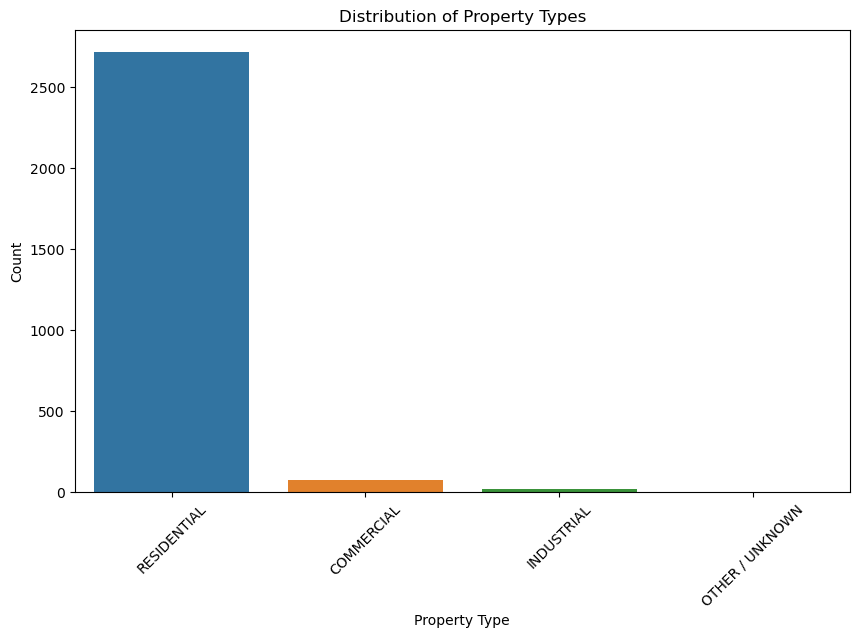

In [249]:
plt.figure(figsize=(10, 6))
sns.countplot(data=property_data_final, x='propsubtype', order=property_data_final['propsubtype'].value_counts().index)
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)


plt.show()

The chart offers insight into the types of properties found in the dataset. It's evident that "RESIDENTIAL" is the predominant category, representing the majority of properties. In contrast, categories like "COMMERCIAL," "INDUSTRIAL," and "OTHER / UNKNOWN" are far less common, indicating their limited presence in the dataset. Essentially, residential properties significantly outnumber other types. This prevalence of residential properties may be attributed to factors such as higher demand for homes compared to commercial or industrial properties, making them a more common choice for property investors and buyers.

### Q3. What heating and cooling system types are found in the properties, and how many properties possess both these systems or solely heating systems?

In [179]:
mode_coolingtype = property_data_final['coolingtype'].mode()[0]
property_data_final.loc[property_data_final['coolingtype'] == 'YES', 'coolingtype'] = mode_coolingtype
print(property_data_final['coolingtype'].value_counts())

None           1549
CENTRAL        1239
EVAPORATIVE      94
PACKAGE          50
FAN COOLING       3
Name: coolingtype, dtype: int64


In [180]:
mode_heatingtype = property_data_final['heatingtype'].mode()[0]
property_data_final.loc[property_data_final['heatingtype'] == 'YES', 'heatingtype'] = mode_heatingtype
print(property_data_final['heatingtype'].value_counts())

FORCED AIR            2433
HOT WATER              421
ELECTRIC                35
RADIANT                 20
FLOOR/WALL FURNACE      17
GRAVITY                  4
ZONE                     2
SPACE                    2
HEAT PUMP                1
Name: heatingtype, dtype: int64


In [181]:
heating_counts = property_data_final['heatingtype'].value_counts().reset_index()
heating_counts.columns = ['Heating Type', 'Count']

fig = px.pie(heating_counts, names='Heating Type', values='Count', title='Distribution of Heating Systems')
fig.show()

#### 
The pie chart provides insights into the heating systems used in homes. The most prevalent heating method is "Forced Air," accounting for a significant majority at 82.9%. In contrast, "Hot Water" heating is the second most common option, representing 14.3% of homes. The remaining 2.8% consists of various less common heating systems like "Electric," "Radiant," "Floor/Wall Furnace," "Gravity," "Zone," "Space," or "Heat Pump." This distribution underscores the dominance of Forced Air and the relatively smaller usage of alternative heating methods in the dataset.

In [182]:
cooling_counts = property_data_final['coolingtype'].value_counts().reset_index()
cooling_counts.columns = ['Cooling Type', 'Count']

fig = px.pie(cooling_counts, names='Cooling Type', values='Count', title='Distribution of Cooling Systems')
fig.show()

#### 
In the pie chart illustrating cooling systems, the majority of properties, approximately 52.8%, are without any specific cooling system ("None"). The next most prevalent cooling system is "Central," utilized in around 42.2% of properties. In contrast, less common cooling methods like "Evaporative," "Package," and "Fan Cooling" make up smaller portions, accounting for approximately 3.2%, 1.7%, and a mere 0.1%, respectively. This highlights that a significant proportion of properties opt for no cooling or rely primarily on central cooling, while alternative cooling technologies have limited usage.

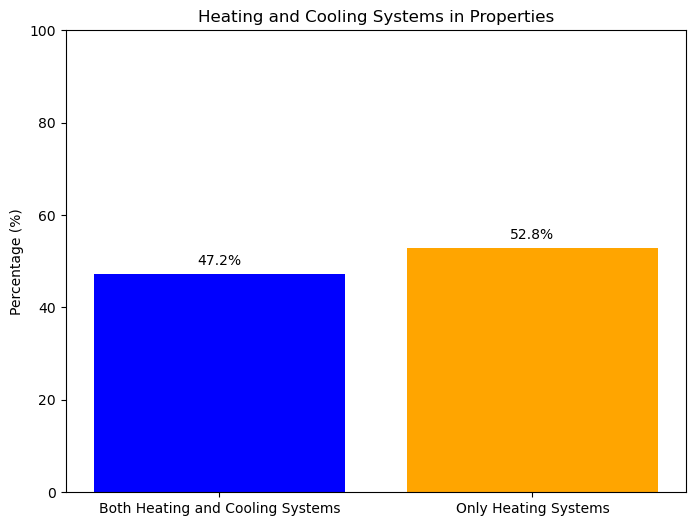

In [178]:
both_systems_count = len(property_data_final[(property_data_final['heatingtype'] != 'None') & (property_data_final['coolingtype'] != 'None')])
heating_only_count = len(property_data_final[(property_data_final['heatingtype'] != 'None') & (property_data_final['coolingtype'] == 'None')])

labels = ['Both Heating and Cooling Systems', 'Only Heating Systems']
percentages = [both_systems_count / len(property_data_final) * 100, heating_only_count / len(property_data_final) * 100]

plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=['blue', 'orange'])
plt.ylabel('Percentage (%)')
plt.title('Heating and Cooling Systems in Properties')
plt.ylim(0, 100)

for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 2, f'{percentage:.1f}%', ha='center')

plt.show()

#### 
The bar graph tells us that nearly half of the properties (47.2%) have both heating and cooling systems, while slightly more than half (52.8%) have only heating systems. This means that heating is more common in these properties, and not all of them have cooling.

### Q4. What is the most common parking type (prkgType) for properties?

Text(0, 0.5, 'Count')

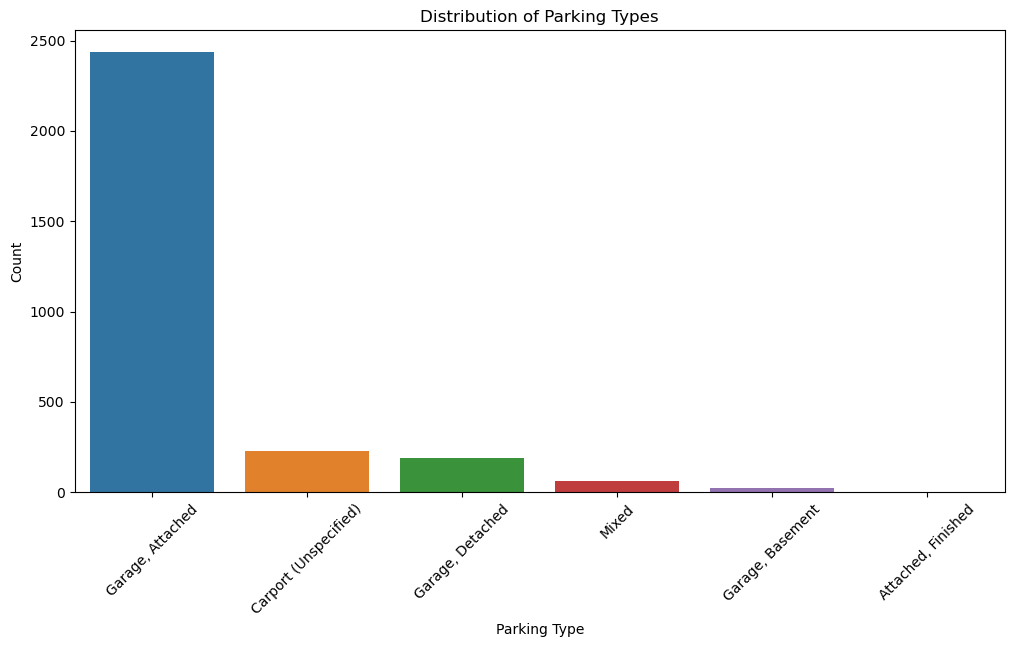

In [190]:
plt.figure(figsize=(12, 6))
sns.countplot(data=property_data_final, x='prkgType', order=property_data_final['prkgType'].value_counts().index)
plt.title('Distribution of Parking Types')
plt.xticks(rotation=45)
plt.xlabel('Parking Type')
plt.ylabel('Count')

#### 
The graph shows that the majority of properties in the dataset are equipped with Attached Garages, which is the most common parking type. Carport and Detached Garage are the next most prevalent parking options, with significantly fewer properties having Mixed and Basement types of garages. In summary, Attached Garages dominate the dataset in terms of parking types.

In [192]:
property_data_final.columns

Index(['property_id', 'lot_size_acres', 'lot_size_sqrft', 'property_address',
       'property_country', 'latitude', 'longitude', 'property_type',
       'propsubtype', 'property_year_built', 'absenteeInd', 'heatingtype',
       'coolingtype', 'wallType', 'saleAmt', 'saleRecDate', 'saleTransType',
       'grosssize', 'grosssizeadjusted', 'groundfloorsize', 'livingsize',
       'baths_partial', 'baths_full', 'bed', 'rooms_total', 'condition',
       'constructiontype', 'frameType', 'prkgSize', 'prkgType', 'levels',
       'bldgType', 'assdImprValue', 'assdTtlValue', 'mktTtlValue', 'taxAmt',
       'taxYear', 'improvementPercent', 'baths_total_calculated'],
      dtype='object')

### Q5. How is the distribution of the total number of rooms (rooms_total) in the properties?

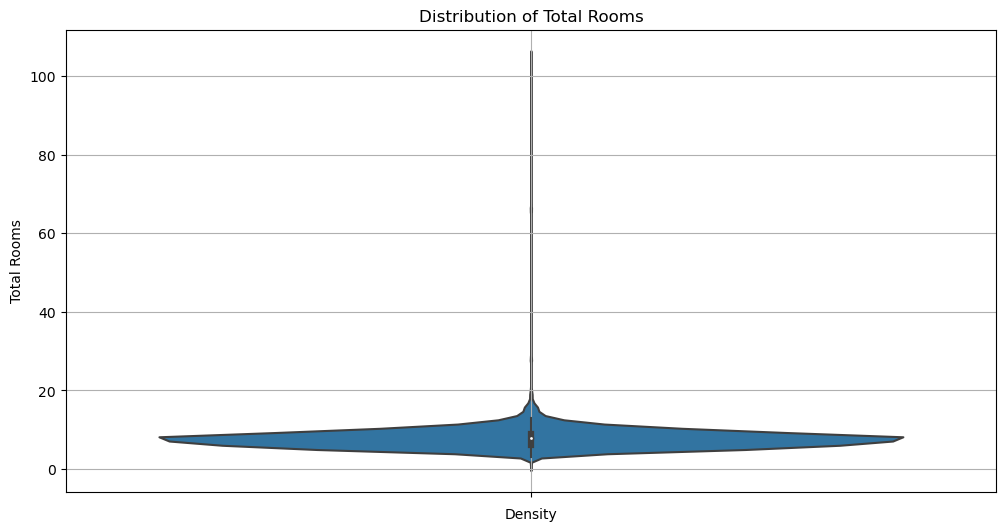

In [194]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=property_data_final, y='rooms_total')
plt.title('Distribution of Total Rooms')
plt.ylabel('Total Rooms')
plt.xlabel('Density')
plt.grid(True)
plt.show()

In [195]:
fig = px.violin(property_data_final, y='rooms_total', box=True, points="all", title='Distribution of Total Rooms')

fig.update_layout(
    yaxis_title='Total Rooms',
    xaxis_title='Density',
    showlegend=False
)
fig.show()

#### 
The violin plot shows that most properties have a relatively small number of rooms, with the majority falling between 5 and 10 rooms. However, there are some unusual cases with a very high number of rooms, such as 66, 105, and 76 rooms, which stand out as exceptions. These properties are quite different from the typical ones in the dataset in terms of room count.

In [196]:
print("Shape of property_data_final before removing outliers:", property_data_final.shape)

Q1 = property_data_final['rooms_total'].quantile(0.25)
Q3 = property_data_final['rooms_total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

property_data_final = property_data_final[(property_data_final['rooms_total'] >= lower_bound) & (property_data_final['rooms_total'] <= upper_bound)]

print("Shape of property_data_final after removing outliers:", property_data_final.shape)

Shape of property_data_final before removing outliers: (2935, 39)
Shape of property_data_final after removing outliers: (2884, 39)


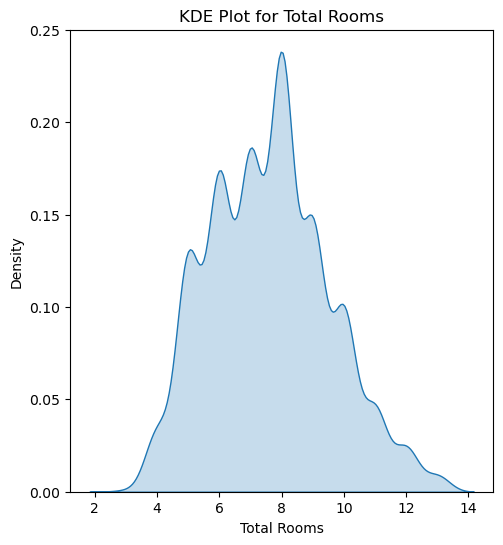

In [203]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=property_data_final, x='rooms_total', shade=True)
plt.title('KDE Plot for Total Rooms')
plt.xlabel('Total Rooms')
plt.ylabel('Density')
plt.show()

#### 

The KDE plot shows that the highest concentration of properties in the dataset is observed when there are 8 rooms, with a density close to 0.24. Additionally, there is a substantial presence of properties with 7 rooms (density around 0.18) and 6 rooms (density approximately 0.17). Notably, the bulk of the data is concentrated within the range of 4 to 12 rooms, reflecting the most common room counts among the properties in the dataset.

In [208]:
property_data_final.dtypes

property_id                 int64
lot_size_acres            float64
lot_size_sqrft            float64
property_address           object
property_country           object
latitude                  float64
longitude                 float64
property_type              object
propsubtype                object
property_year_built       float64
absenteeInd                object
heatingtype                object
coolingtype                object
wallType                   object
saleAmt                   float64
saleRecDate                object
saleTransType              object
grosssize                 float64
grosssizeadjusted         float64
groundfloorsize           float64
livingsize                float64
baths_partial             float64
baths_full                float64
bed                       float64
rooms_total               float64
condition                  object
constructiontype           object
frameType                  object
prkgSize                  float64
prkgType      

### Factors influencing Sale Value

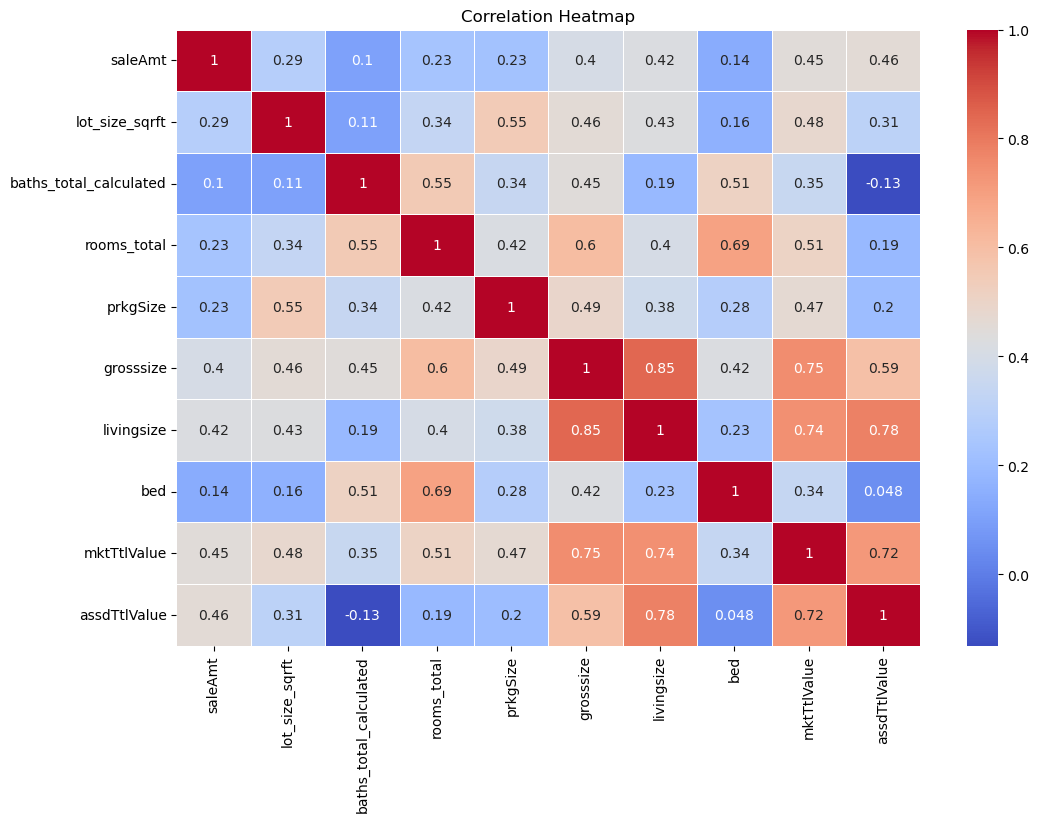

In [213]:
selected_columns = [
    'saleAmt', 'lot_size_sqrft', 'baths_total_calculated', 'rooms_total', 'prkgSize', 'grosssize', 'livingsize', 'bed', 'mktTtlValue', 'assdTtlValue'
]

correlation_matrix = property_data_final[selected_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### 

The heatmap displays a chart that helps us see how different aspects of properties relate to their sale prices. In this chart, we observe that attributes like 'grosssize' (total size of the property) and 'livingsize' (living area size) have a strong positive connection with higher sale prices. This means that larger properties tend to sell for more money. Similarly, 'mktTtlValue' and 'assdTtlValue' (market and assessed property values) are also positively linked to higher sale prices. On the other hand, variables like 'lot_size_sqrft' (lot size in square feet) and 'bed' (number of bedrooms) have a less significant impact on sale prices. This heatmap provides valuable insights into how these factors influence property sale prices.

### Q. Does Property Condition influence sale price?

In [242]:
fig = px.box(property_data_final, x='condition', y='saleAmt', category_orders={'condition': ['FAIR', 'EXCELLENT', 'VERY GOOD', 'GOOD', 'AVERAGE']})
fig.update_layout(title='Sale Price vs. Property Condition', xaxis_title='Condition', yaxis_title='Sale Price')
fig.show()

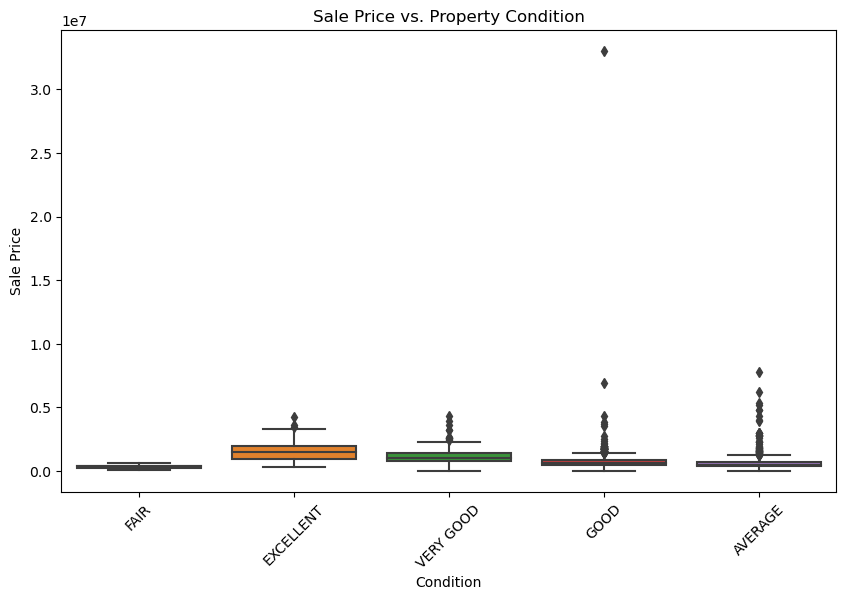

In [224]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=property_data_final, x='condition', y='saleAmt', order=['FAIR', 'EXCELLENT', 'VERY GOOD', 'GOOD', 'AVERAGE'])
plt.title('Sale Price vs. Property Condition')
plt.xlabel('Condition')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)

plt.show()

#### 
Properties in excellent condition tend to have a higher average sale price compared to those in very good, good, fair, and average conditions. Following excellent condition, properties in very good, good, and average conditions also show relatively higher average sale prices. Conversely, properties in fair condition tend to have lower sale values.

### Q. Does the property's sale price tend to rise over the years?

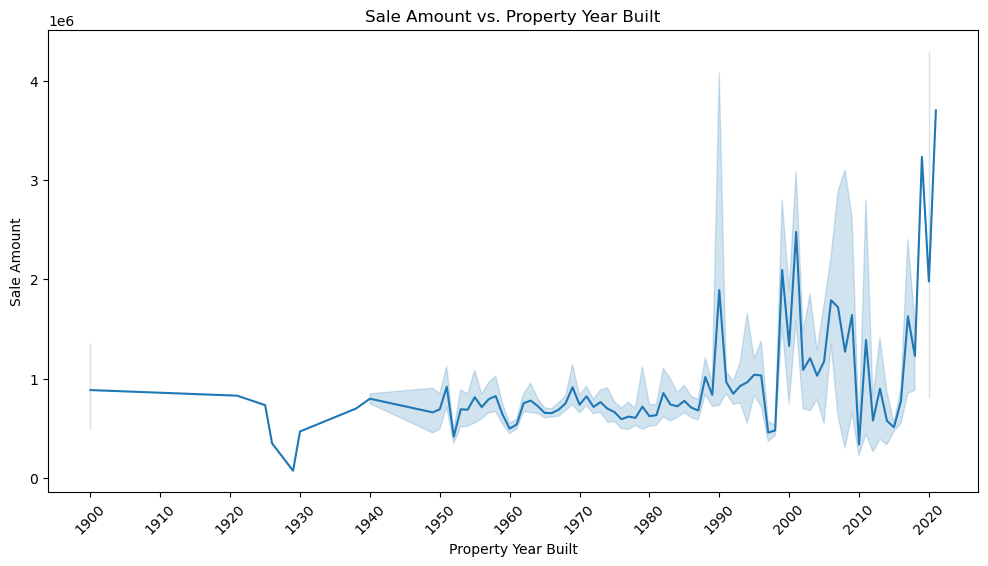

In [246]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=property_data_final, x='property_year_built', y='saleAmt')
plt.title('Sale Amount vs. Property Year Built')
plt.xlabel('Property Year Built')
plt.ylabel('Sale Amount')
plt.xticks(rotation=45, ticks=range(1900, 2022, 10))
plt.show()

Based on the Line graph provided, it's evident that property sale prices have experienced fluctuations throughout the years. Notably, there was a significant dip in prices during the 1930s, followed by a period of stability. In the 1990s, there was a notable increase in property sale values, followed by a decline in the early 2000s. Prices then reached a peak before dropping just before the 2008 financial crisis. Subsequently, there was a gradual increase, resulting in the current highest values we observe today.

### Q. What is the typical or average size of the living area in a house?

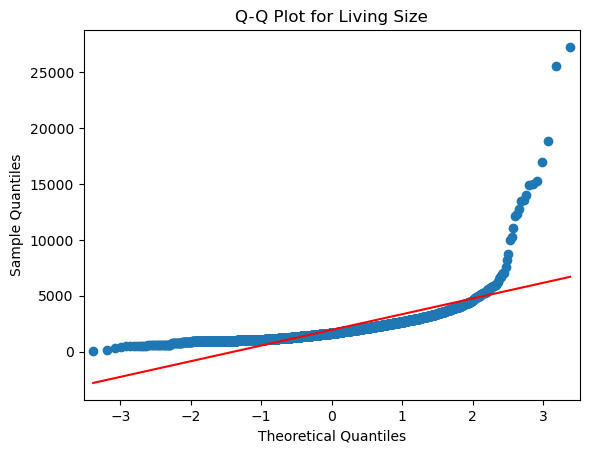

In [251]:
data = property_data_final['livingsize']

sm.qqplot(data, line='s')

plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot for Living Size')

plt.show()

The Q-Q plot for living size data reveals a noticeable positive skewness in the distribution, as the majority of data points diverge above the expected straight line. This skewness indicates that the dataset is tilted towards smaller living sizes, with a longer tail on the right, signifying a prevalence of properties with modest living spaces and fewer with exceptionally large ones. This skewness should be considered in statistical analyses and modeling, as it can impact the assumptions and inferences drawn from the data.

### What is the distribution of the number of bedrooms (bed) in the properties, and which range of bedroom counts appears to be the most common among the properties in the dataset?

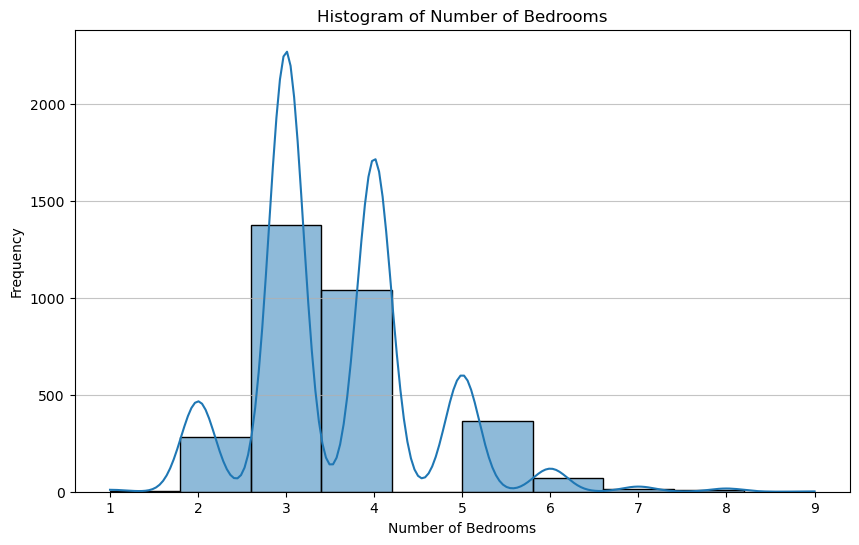

In [241]:
filtered_bed_data = property_data[(property_data['bed'] >= 1) & (property_data['bed'] <= 10)]['bed']

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_bed_data, bins=10, kde=True)
plt.title('Histogram of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()

The histogram illustrates that for properties with up to 9 bedrooms, the majority falls into the 3-bedroom and 4-bedroom categories, with 3-bedroom properties being the most numerous, closely followed by 4-bedroom ones. The next most common category is 5-bedroom properties, followed by 2-bedroom and 6-bedroom properties. Fewer properties have other bedroom counts, indicating a relatively smaller proportion in these categories.